# Lista 08 - Matheus Carvalho - 231708017

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

## Questão 01

Priemiramente, vou carregar a imagem e aplicar os procedimentos adequados. Vou confessar que não entendo muito desses parâmetros, mas fiz uma força para saber o que cada um deles fazia. Percebi, que ele tava identificando os dois lados das varetas, ou seja, tava contando cada uma duas vezes. Pensei em formas de remediar isso, não soube muito bem, a não ser dividir o número de linhas por 2. 

In [3]:
# voui carregar a imagem 
imagem = cv2.imread('jogo-dos-palitos.png')
# converto a imagem para escala de cinza (já tinha feito isso em tarefas anteriores)
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
# aplica o método de Canny para detecção de bordas
bordas = cv2.Canny(imagem_cinza, 50, 150, apertureSize=7)
# aplico a transformada de Hough para detectar linhas
linhas = cv2.HoughLines(bordas, 1, np.pi/180, 175)

In [4]:
# Contar o número de linhas detectadas
num_linhas = int(len(linhas)/2)
print(f"Número de varetas detectadas: {num_linhas}")

Número de varetas detectadas: 10


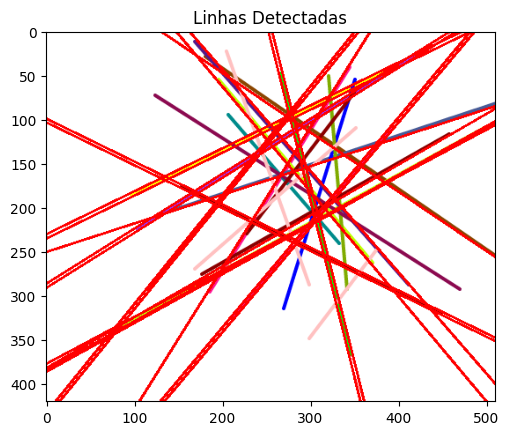

In [5]:
# aqui vou desenhar as linhas detectadas na imagem original, inflelizmente, muitas das arestas paralelas que representam 
# a mesma vareta foram detectadas/plotadas como diferentes (não sei o que fazer pra contornar isso), visto que 
# para desenha as retas, já tive que pedir ajuda para o GPT 
for linha in linhas:
    rho, theta = linha[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(imagem, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Linhas Detectadas")
plt.show()

## Questão 02

Essa foi bem intuitiva. Nunca tinha feito, logo precisei de uma ajuda, mas, rapidamente, entendi a ideia. Faço o mesmo processo de carregar e converter a imagem para cinza, uso um blur (técnica que já tinha sido abordada ao longo de outras tarefas), aplico a transformada de Hough para circulos (passando alguns parâmetros que eu confesso que não sei o que significam), logo em seguida contamos o número de círculos detectados (dependendo do tamanho min/max do raio, é possível identificar um determinado número de circulos) e, por fim, plota a imagem e por cima os circulos detectados.

Número de hemácias detectadas: 181


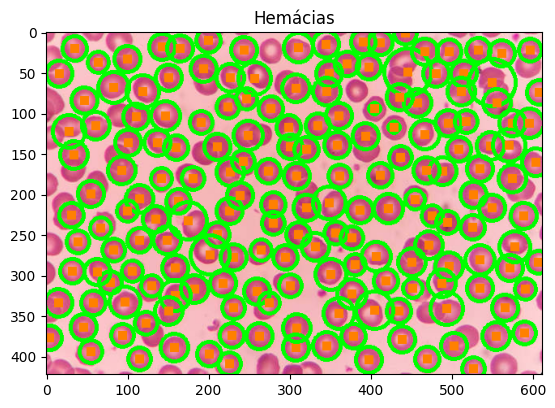

In [6]:
# vou carregar a imagem 
imagem = cv2.imread('Hemacias.jpg')
# converto a imagem para escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
# vamos aplicar um blur, para desfocar a imagem e tentar remover o ruído
imagem_cinza = cv2.medianBlur(imagem_cinza, 5)
# vamos aplicar a transformada de Hough para detectar círculos
circulos = cv2.HoughCircles(imagem_cinza, 
                            cv2.HOUGH_GRADIENT, 
                            dp=1.2, 
                            minDist=20, 
                            param1=50, 
                            param2=30, 
                            minRadius=5,
                            maxRadius=30)

# arredondar os valores dos círculos detectados
circulos = np.round(circulos[0, :]).astype("int")
num_circulos = len(circulos)
print(f"Número de hemácias detectadas: {num_circulos}")

# desenhar os círculos detectados na figura (passando a posição do centro e o raio)
for (x, y, r) in circulos:
    cv2.circle(imagem, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(imagem, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title("Hemácias")
plt.show()

Tinha citado isso, acima, mas quis dar uma olhada de como funcionaria na prática. Note que, ao aumentar o raio máximo, o número de círculos detectados vai sempre aumentar (ele vai achar que tudo é círculo em um caso extremo). Porém, pela curva plotada, abaixo, vemos que o valor que escolhemos acima pode ser considerado um valor próximo do ótimo (se não ótimo). Ele está contido no primeiro momento de estabilização, após o reconhecimento de grande parte das hemácias. Algo maior que isso, acredito que a anásile começa a ficar perturbada.

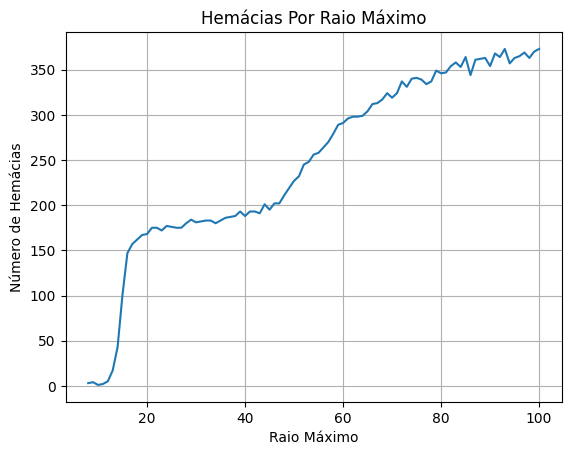

In [7]:
list_max = []
list_hemacias = []
for max in range(6, 101):
    circulos = cv2.HoughCircles(imagem_cinza, 
                                cv2.HOUGH_GRADIENT, 
                                dp=1.2, 
                                minDist=20, 
                                param1=50, 
                                param2=30, 
                                minRadius=5,
                                maxRadius=max)
    try:
        circulos = np.round(circulos[0, :]).astype("int")
        num_circulos = len(circulos)
        list_max.append(max)
        list_hemacias.append(num_circulos)
    except:
        pass

plt.plot(list_max, list_hemacias)
plt.title("Hemácias Por Raio Máximo")
plt.grid(True)
plt.xlabel("Raio Máximo")
plt.ylabel("Número de Hemácias")
plt.show()

## Questão 03

Estou fazendo essa lista no dia 17/06. Tirei o dia do hoje para fazer tarefas paralelas para que não atrapalhe meu desempenho durante a A2. Certamente, de todas as questões das duas listas, essa foi a que eu menos entendi. Tentei ler documentação, algumas [implementações em python](https://gitlab.com/Star-Man/image-reconstruction-from-a-sinogram), mas achei muito complicado. Enfim, o resultado que consegui encontrar foi o apresentado abaixo. Confesso que precisei da ajuda do GPT e meu entendimento do processo é limitado. Esse [vídeo](https://www.youtube.com/watch?v=gQUOBM5Hon4) me ajudou a entender o que acontece, mas implementar é outra história.

Acho válido pontuar que também assisti [esse outro vídeo](https://www.youtube.com/watch?v=f0sxjhGHRPo) e ele me deu uma base maior, mas ainda não suficiente para implementar sozinho. 

In [14]:
# carrego a imagem e converto para escala de cinza
image_path = 'baldtin1000pb.png'
image = imread(image_path, mode='F')

# vou definir os parâmetros da Transformada de Hough
theta_resolution = 100
r_resolution = 82
theta = np.linspace(0, np.pi, theta_resolution)
diag_len = int(np.ceil(np.sqrt(image.shape[0]**2 + image.shape[1]**2)))
r = np.linspace(-diag_len, diag_len, r_resolution)

# incializo o sinograma
sinogram = np.zeros((r_resolution, theta_resolution))

# implemento a Transformada de Hough pixel a pixel
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        # se o pixel for diferente de zero (preto), calculo a Transformada de Hough
        if image[y, x] > 0:  
            # para cada valor de theta, calculo o valor de r
            for t_idx in range(len(theta)):
                t = theta[t_idx]
                r_val = x * np.cos(t) + y * np.sin(t)
                r_idx = np.argmin(np.abs(r - r_val))
                sinogram[r_idx, t_idx] += image[y, x]


C:\Users\mathe\AppData\Local\Temp\ipykernel_3992\2200525976.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path, mode='F')


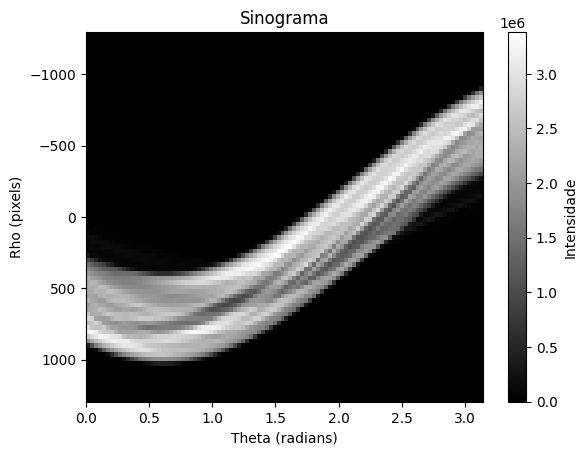

In [15]:
plt.imshow(sinogram, cmap='gray', aspect='auto', extent=(0, np.pi, r[-1], r[0]))
plt.xlabel('Theta (radians)')
plt.ylabel('Rho (pixels)')
plt.title('Sinograma')
plt.colorbar(label='Intensidade')
plt.show()

## Questão 04

$$
    S(\theta, p) = \sum_{x, y} I(x, y)\delta(p - x\cos(\theta) - y\sin(\theta))
$$

A função $I(x, y)$ é a intensidade do pixel na posição inserida e $\delta$ é uma função (pelo que eu encontrei a função de Dirac) que garante que apenas os pontos correspondentes ao par $(\theta, p)$ sejam considerados no cálculo. 